<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../Assets/ATLASOD.gif" style="width:50%"></a>
</CENTER>

# A more difficult notebook in C++

### In this notebook you can find a more difficult program that shows further high energy physics (HEP) analysis techniques.

##### The following analysis is searching for events where [Z bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two leptons of same flavour and opposite charge (to be seen for example in the [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram)).

<CENTER><img src="../Assets/Z_ElectronPositron.png" style="width:30%"></CENTER>

At first we have to include several helpers that will support our analysis.

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic:

In [2]:
//%jsroot on

Next we have to open the data that we want to analyze. It is stored in a _*.root_ file. By creating a _TChain_ it is possible to add more datasets and accordingly analyze more data.

In [3]:
TChain *dataset = new TChain("mini");

This following input is read directly from the same storage - so it is faster. If you want to you can comment in the last line to read it from the internet.

In [4]:
//dataset->Add("/home/student/datasets/MC/mc_105986.ZZ.root");
dataset->Add("http://opendata.atlas.cern/release/samples/MC/mc_105986.ZZ.root");
//dataset->Add("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root");

We now declare some variables that are later used in the analysis.

In [5]:
const int vs = 5;

Int_t   lepton_n = -1,
        lepton_charge[vs], //electrical charge of the lepton
        lepton_type[vs];   //flavour of the lepton

Float_t lepton_pt[vs],
        lepton_eta[vs],
        lepton_phi[vs],
        lepton_E[vs];

After we declared these variables we have to say the program where it can find the values for the variables.

In [6]:
dataset->SetBranchAddress("lep_n",      &lepton_n);
dataset->SetBranchAddress("lep_charge", &lepton_charge);
dataset->SetBranchAddress("lep_type",   &lepton_type);
dataset->SetBranchAddress("lep_pt",     &lepton_pt);
dataset->SetBranchAddress("lep_eta",    &lepton_eta);
dataset->SetBranchAddress("lep_phi",    &lepton_phi);
dataset->SetBranchAddress("lep_E",      &lepton_E);

Now we will create a histogram specifying its title and axes titles. Moreover we define that it consists of 30 so called bins which have a range from 40 to 140. Additionaly we set the colour of the integral blue.

In [7]:
TH1F *hist = new TH1F("variable","Mass of the Z boson; mass [GeV]; events",30,40,140);
hist->SetFillColor(kBlue);

In the following lines we can say how much data we want to analyze and we also ask some informations about the analysis itself. The results are given out under the box.

In [8]:
int nentries, nbytes, i;
nentries = (Int_t)dataset->GetEntries();

// IMPORTANT: fraction events we want to run
fraction_events = 1;
events_to_run = nentries*fraction_events;

std::cout << "Total # events = "  << nentries
          << ". Events to run = " << events_to_run
          << " corresponding to " << fraction_events*100
          << "% of total events!" << std::endl;

Total # events = 125000. Events to run = 125000 corresponding to 100% of total events!


Time to fill our above defined histogram. At first we define some variables and then we loop over the data. We also make some cuts as you can see in the // _comments_.

In [9]:
TLorentzVector l1;         
                TLorentzVector l2;  
                               TLorentzVector invmass;  

for (i = 0; i < nentries; i++)
{
    nbytes = dataset->GetEntry(i);
    
    // Cut #1: At least 2 leptons
    if(lepton_n == 2)
    {
        // Cut #2: Leptons with opposite charge
        if(lepton_charge[0] != lepton_charge[1])
        {
            // Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if(lepton_type[0] == lepton_type[1])
            {
                l1.SetPtEtaPhiE(lepton_pt[0]/1000., lepton_eta[0], lepton_phi[0], lepton_E[0]/1000.);
                l2.SetPtEtaPhiE(lepton_pt[1]/1000., lepton_eta[1], lepton_phi[1], lepton_E[1]/1000.);
                // The default value in the root file is in MeV, so, we divide by 1000 to get it in GeV
                invmass = l1 + l2;
                hist->Fill(invmass.M());
            }
        }
    }
}

We now want to see our results. At first we will create a canvas, the entity which in ROOT holds graphics primitives. Then we draw the histogram on the canvas and after that the canvas on which the histogram lies. Once the histogram is created you can zoom in and out because it is interactive. 

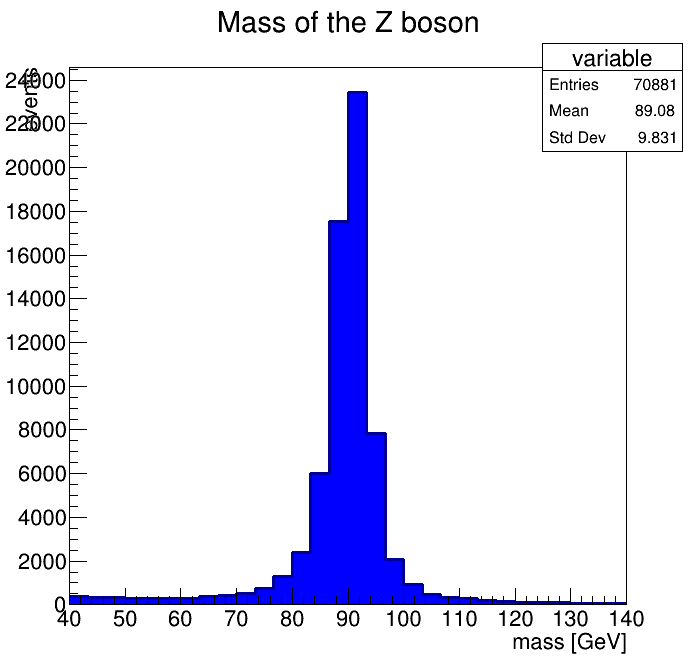

In [10]:
TCanvas *canvas = new TCanvas("c","c",10,10,700,700);
hist->Draw();
canvas->Draw();